# Challenge - Diabetes Classification

In this problem you are given a Diabetes Data set consisting of following features -

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

and your task is to predict whether a person is suffering from diabetes or not (Binary Classification)

### Tasks
- Plot a bar graph showing number of classes and no of examples in each class.
- Classification Task, classify a person as 0 or 1 (Diabetic or Not) using K-Nearest Neighbors classifier.

#### Preparing Dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X_train = pd.read_csv('./datasets/Diabetes_Xtrain.csv').values
Y_train = pd.read_csv('./datasets/Diabetes_Ytrain.csv').values
X_test = pd.read_csv('./datasets/Diabetes_Xtest.csv').values

print(X_train.shape, Y_train.shape, X_test.shape)

(576, 8) (576, 1) (192, 8)


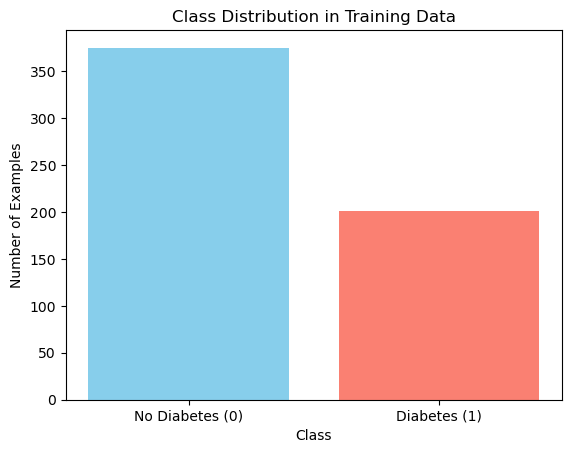

In [32]:
#Plotting the database distribution

y = Y_train.flatten()

# Count number of examples in each class
unique, counts = np.unique(y, return_counts=True)

# Bar plot
plt.bar(unique, counts, color=['skyblue', 'salmon'])
plt.xticks([0,1], ['No Diabetes (0)', 'Diabetes (1)'])
plt.xlabel("Class")
plt.ylabel("Number of Examples")
plt.title("Class Distribution in Training Data")
plt.show()

#### KNN

In [33]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, query, k=5):
    m = X.shape[0]
    vals =[]
    Y = Y.ravel()

    for i in range(m):
        d = dist(query, X[i])
        label = int(Y[i])
        vals.append((d, label))

    vals = sorted(vals)[:k]
    vals = np.array(vals)

    #return max_val
    new_vals = np.unique(vals[:,1],return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred


In [34]:
output = []
for i in range(X_test.shape[0]):
    pred = knn(X_train, Y_train, X_test[i])
    output.append(pred)

output = np.array(output)


#### Exporting File

In [ ]:
output = output.reshape((output.shape[0],1))
output = pd.DataFrame(output, columns=['Outcome'])

#output.to_csv('Diabetes_Submission.csv', index=False)